<a href="https://colab.research.google.com/github/jetstarfish5599/PAI-LAB/blob/main/PAI_Lab_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Q1
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Dataset
years = np.array([1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7])
salary = np.array([39.0, 46.0, 47.0, 52.0, 56.0, 64.0, 65.0, 67.0, 68.0, 70.0])
#Calculation
x = years
y = salary

x_mean = np.mean(x)
y_mean = np.mean(y)

#slope
b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)

#intercept
b0 = y_mean - b1 * x_mean

#prediction
pred_manual = b0 + b1 * 4.5

#R²
y_pred_all = b0 + b1 * x
ss_res = np.sum((y - y_pred_all)**2)
ss_tot = np.sum((y - y_mean)**2)
r2_manual = 1 - ss_res/ss_tot

print("Manual regression")
print("Intercept (b0):", round(b0, 4))
print("Slope (b1):", round(b1, 4))
print("Prediction (4.5 yrs):", round(pred_manual, 4), "thousand")
print("R²:", round(r2_manual, 4))


#Scikit Learn

model = LinearRegression()
model.fit(years.reshape(-1, 1), salary)

pred_sklearn = model.predict([[4.5]])

print("\nRegression  with Scikit Learn")
print("Intercept (b0):", round(model.intercept_, 4))
print("Slope (b1):", round(model.coef_[0], 4))
print("Prediction (4.5 yrs):", round(pred_sklearn[0], 4), "thousand")
print("R²:", round(r2_score(salary, model.predict(years.reshape(-1, 1))), 4))


Manual regression
Intercept (b0): 28.8687
Slope (b1): 11.8387
Prediction (4.5 yrs): 82.1429 thousand
R²: 0.9788

Regression  with Scikit Learn
Intercept (b0): 28.8687
Slope (b1): 11.8387
Prediction (4.5 yrs): 82.1429 thousand
R²: 0.9788


   ScreenOnTime  BatteryLife
0      4.996321    21.137193
1      9.605714    12.261203
2      7.855952    15.996928
3      6.789268    14.797964
4      3.248149    23.823824


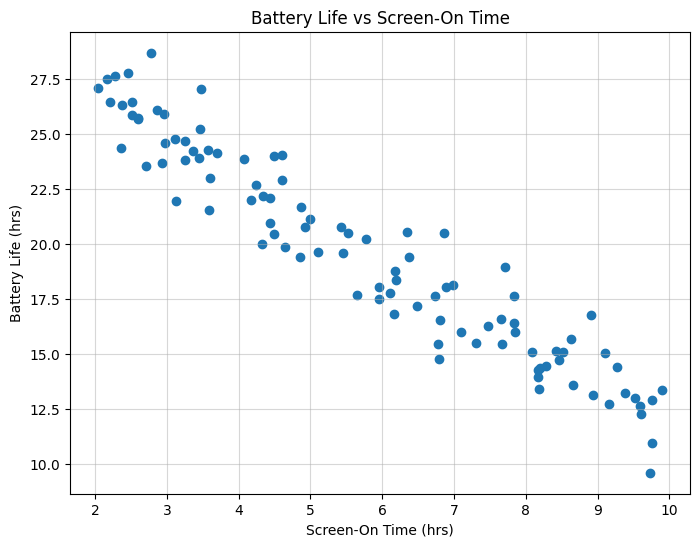

Correlation: -0.9574
yep it's negative
Intercept: 30.4951
Slope: -1.8862
R²: 0.9166
Battery life at 6 hrs screen time: 19.18


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


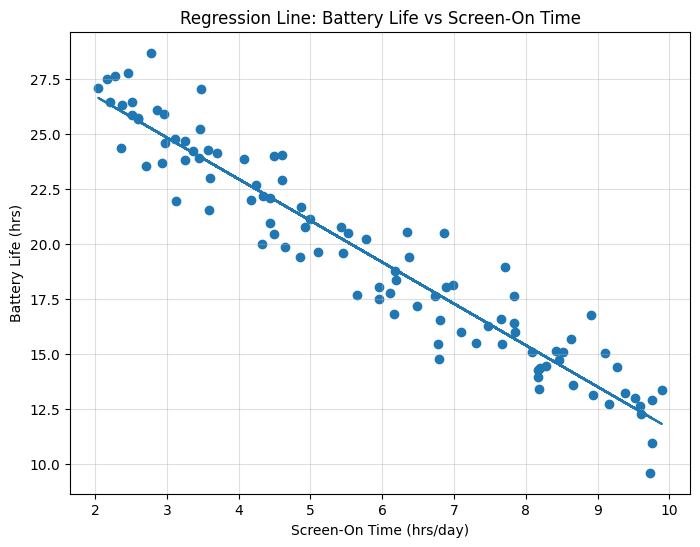

In [2]:
#Q2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Custom dataset
np.random.seed(42)
screen_on = np.random.uniform(2, 10, 100)
battery_life = 30 - 1.8*screen_on + np.random.normal(0, 1.5, 100)

#DataFrame for set
df = pd.DataFrame({
    "ScreenOnTime": screen_on,
    "BatteryLife": battery_life
})

print(df.head())

#visualize relation
plt.figure(figsize=(8,6))
plt.scatter(df["ScreenOnTime"], df["BatteryLife"])
plt.xlabel("Screen-On Time (hrs)")
plt.ylabel("Battery Life (hrs)")
plt.title("Battery Life vs Screen-On Time")
plt.grid(alpha=0.5)
plt.show()

#correlation
correlation = df["ScreenOnTime"].corr(df["BatteryLife"])
print("Correlation:", round(correlation, 4))
print("yep it's negative" if correlation < 0 else "nah it's not negative")

#Linear regression model
X = df[["ScreenOnTime"]]
y = df["BatteryLife"]
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(X)

print("Intercept:", round(model.intercept_, 4))
print("Slope:", round(model.coef_[0], 4))
print("R²:", round(r2_score(y, predicted), 4))

#Prediction
pred_6hrs = model.predict([[6]])[0]
print("Battery life at 6 hrs screen time:", round(pred_6hrs, 2))

#regression line
plt.figure(figsize=(8,6))
plt.scatter(df["ScreenOnTime"], df["BatteryLife"])
plt.plot(df["ScreenOnTime"], predicted)
plt.xlabel("Screen-On Time (hrs/day)")
plt.ylabel("Battery Life (hrs)")
plt.title("Regression Line: Battery Life vs Screen-On Time")
plt.grid(alpha=0.4)
plt.show()


Intercept: -74.6071
Slope: 0.8357
R²: 0.9948
Predicted weight at 172 cm: 69.14 kg


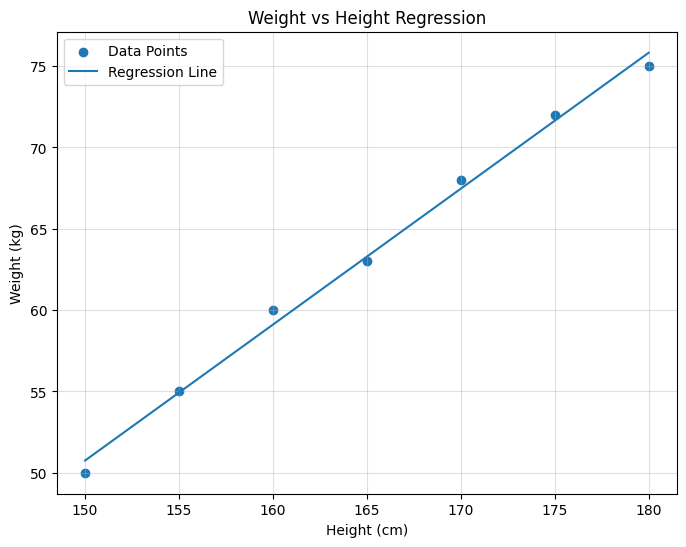

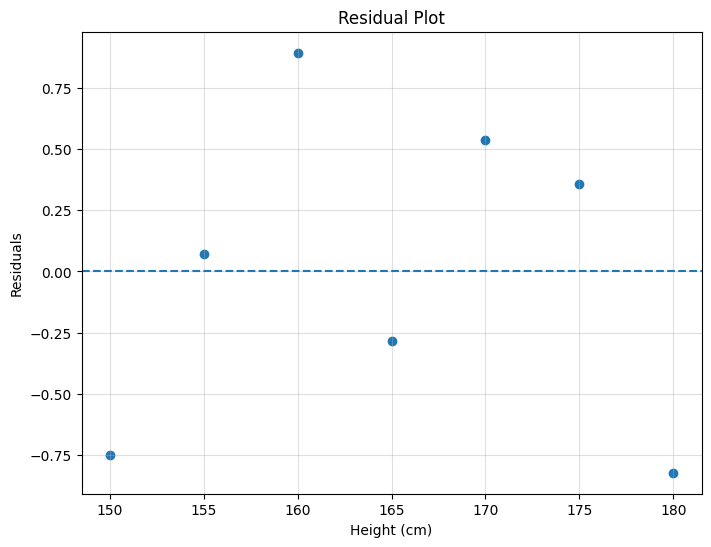

Residuals appear small and randomly scattered. Linear model seems appropriate.


In [3]:
#Q3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Dataset
height = np.array([150,155,160,165,170,175,180]).reshape(-1,1)
weight = np.array([50,55,60,63,68,72,75])

#Linear regression Model
model = LinearRegression()
model.fit(height, weight)
predicted_line = model.predict(height)

#model parameters
print("Intercept:", round(model.intercept_, 4))
print("Slope:", round(model.coef_[0], 4))
print("R²:", round(r2_score(weight, predicted_line), 4))

#Prediction for 172 cm
pred_172 = model.predict([[172]])[0]
print("Predicted weight at 172 cm:", round(pred_172, 2), "kg")

#Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(height, weight, label="Data Points")
plt.plot(height, predicted_line, label="Regression Line")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Weight vs Height Regression")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

#Residual analysis
residuals = weight - predicted_line
plt.figure(figsize=(8,6))
plt.scatter(height, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Height (cm)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(alpha=0.4)
plt.show()

#Comment
if abs(residuals).mean() < 3:
    print("Residuals appear small and randomly scattered. Linear model seems appropriate.")
else:
    print("Residuals show patterns or large deviations. Linear assumptions may not fully hold.")


=== Model Without Outlier ===
Intercept: -74.6071
Slope: 0.8357
R²: 0.9948

=== Model With Outlier (190 cm, 60 kg) ===
Intercept: -6.3133
Slope: 0.4115
R²: 0.4216


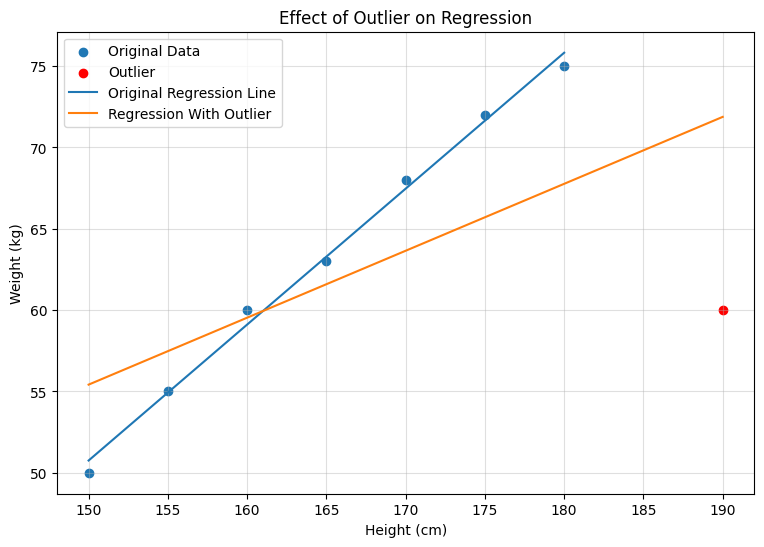


The outlier significantly changes the slope and intercept, reducing model accuracy.


In [4]:
#Q4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Original data
height = np.array([150,155,160,165,170,175,180]).reshape(-1,1)
weight = np.array([50,55,60,63,68,72,75])

#Model without outlier
model_clean = LinearRegression()
model_clean.fit(height, weight)
pred_clean = model_clean.predict(height)

print("=== Model Without Outlier ===")
print("Intercept:", round(model_clean.intercept_, 4))
print("Slope:", round(model_clean.coef_[0], 4))
print("R²:", round(r2_score(weight, pred_clean), 4))

#Add outlier
height_out = np.append(height, [[190]], axis=0)
weight_out = np.append(weight, 60)

#Model with outlier
model_out = LinearRegression()
model_out.fit(height_out, weight_out)
pred_out = model_out.predict(height_out)

print("\n=== Model With Outlier (190 cm, 60 kg) ===")
print("Intercept:", round(model_out.intercept_, 4))
print("Slope:", round(model_out.coef_[0], 4))
print("R²:", round(r2_score(weight_out, pred_out), 4))

#Plot comparison
plt.figure(figsize=(9,6))
plt.scatter(height, weight, label="Original Data")
plt.scatter([190], [60], color="red", label="Outlier")
plt.plot(height, pred_clean, label="Original Regression Line")
plt.plot(height_out, pred_out, label="Regression With Outlier")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Effect of Outlier on Regression")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

#explained results
if model_out.coef_[0] != model_clean.coef_[0]:
    print("\nThe outlier significantly changes the slope and intercept, reducing model accuracy.")
else:
    print("\nThe outlier has minimal impact on the model.")


Accuracy: 0.8117
Precision: 0.8133


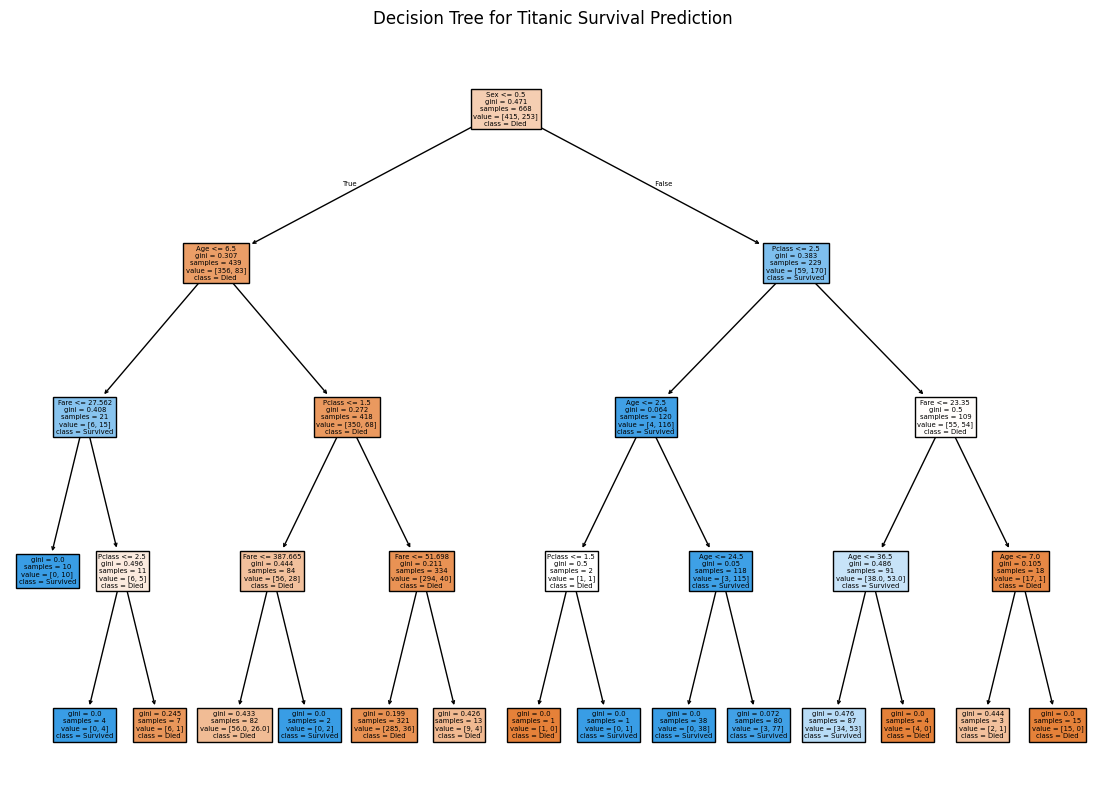

In [5]:
#Q5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

#Load Train dataset
df = pd.read_csv("traintitanic.csv")

#Select relevant features
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]]

#Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())

#Encode categorical data
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

#Separate features and target
X = df[["Pclass", "Sex", "Age", "Fare"]]
y = df["Survived"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

#Decision Tree Model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("Precision:", round(prec, 4))

#Tree Visualization
plt.figure(figsize=(14,10))
plot_tree(model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()


In [6]:
#Q6
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#read csv
df = pd.read_csv('traintitanic.csv')

#fill age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

#fill embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#fill fare just in case
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

#manual mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#selecting features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']


#split for checking
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#low depth
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

#final reveal
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print(f"final accuracy: {acc:.4f}")


final accuracy: 0.7989


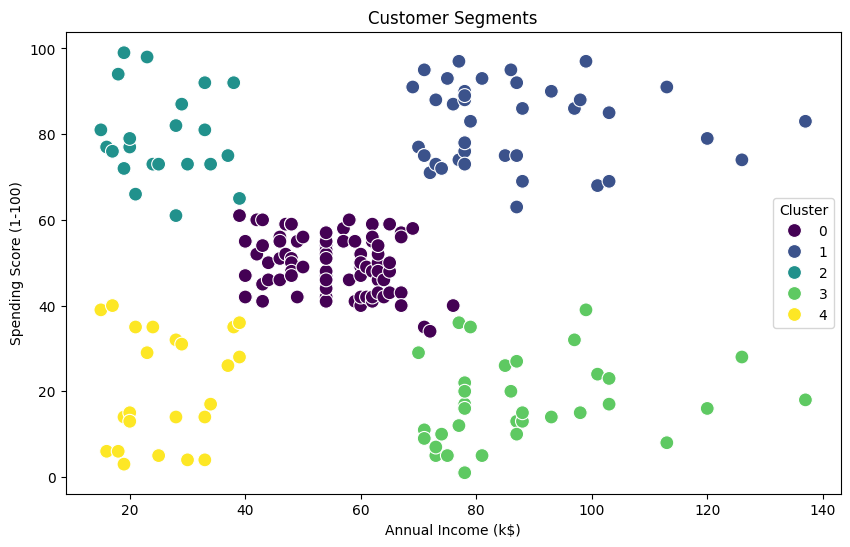

Cluster Summary (Means):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Interpretation
Cluster 0: Moderate Income, Moderate Spending = 'Standard Customers'
Cluster 1: High Income, High Spending = 'Target/VIO Customers'
Cluster 2: Low Income, High Spending = 'Careless/Impulse Buyers'
Cluster 3: High Income, Low Spending = 'Frugal/Saver Customers'
Cluster 4: Low Income, Low Spending = 'Sensible/Conservative Customers'


In [7]:
#Q7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Load dataset
df = pd.read_csv('Mall_Customers.csv')

#Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Determine clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#Train K-Means Model with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

#Add labels
df['Cluster'] = y_kmeans

#Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

#Interpret clusters
#mean=characteristic
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary (Means):")
print(cluster_summary)

print("\nInterpretation")
print("Cluster 0: Moderate Income, Moderate Spending = 'Standard Customers'")
print("Cluster 1: High Income, High Spending = 'Target/VIO Customers'")
print("Cluster 2: Low Income, High Spending = 'Careless/Impulse Buyers'")
print("Cluster 3: High Income, Low Spending = 'Frugal/Saver Customers'")
print("Cluster 4: Low Income, Low Spending = 'Sensible/Conservative Customers'")

In [10]:
#Q8
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load dataset
df = pd.read_csv('trainhouse.csv')

#Select features and target
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']
target = 'SalePrice'

#Handle missing values
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)

print("\n--- Interpretation ---")
for index, row in coefficients.iterrows():
    print(f"{row['Feature']}: A 1 unit increase is associated with a ${row['Coefficient']:.2f} increase in SalePrice.")

#Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nR²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

#Determine Most Impactful Feature
most_impactful = coefficients.loc[coefficients['Coefficient'].abs().idxmax()]
print(f"\nMost Impactful Feature (per unit change): {most_impactful['Feature']} (Coefficient: {most_impactful['Coefficient']:.2f})")

Coefficients:
       Feature   Coefficient
0  OverallQual  22383.547361
1    GrLivArea     53.807558
2   GarageCars  16653.617377
3    YearBuilt    375.218669

--- Interpretation ---
OverallQual: A 1 unit increase is associated with a $22383.55 increase in SalePrice.
GrLivArea: A 1 unit increase is associated with a $53.81 increase in SalePrice.
GarageCars: A 1 unit increase is associated with a $16653.62 increase in SalePrice.
YearBuilt: A 1 unit increase is associated with a $375.22 increase in SalePrice.

R²: 0.7644
RMSE: 42509.32

Most Impactful Feature (per unit change): OverallQual (Coefficient: 22383.55)


In [11]:
#Q9
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#Load dataset
try:
    df = pd.read_csv('laptop_price.csv', encoding='latin-1')
except:
    df = pd.read_csv('laptop_price.csv')

#Cleaning
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df['Cpu_Freq'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?)GHz')[0].astype(float)
df['Memory_Clean'] = df['Memory'].str.split('+').str[0]
df['Storage_GB'] = df['Memory_Clean'].str.extract(r'(\d+)')[0].astype(float)
mask_tb = df['Memory_Clean'].str.contains('TB')
df.loc[mask_tb, 'Storage_GB'] = df.loc[mask_tb, 'Storage_GB'] * 1024

# Select Features and Target
feature_cols = ['Ram', 'Weight', 'Cpu_Freq', 'Storage_GB']
target_col = 'Price_euros'

#Drop errors with NaNs
df_clean = df.dropna(subset=feature_cols + [target_col])

X = df_clean[feature_cols]
y = df_clean[target_col]

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#UNSCALED DATA
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)

r2_unscaled = r2_score(y_test, y_pred_unscaled)
rmse_unscaled = np.sqrt(mean_squared_error(y_test, y_pred_unscaled))

#SCALED DATA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

#Final data
print(f"{'Metric':<20} | {'Unscaled':<10} | {'Scaled':<10}")
print("-" * 46)
print(f"{'R-squared':<20} | {r2_unscaled:.4f}     | {r2_scaled:.4f}")
print(f"{'RMSE':<20} | {rmse_unscaled:.2f}      | {rmse_scaled:.2f}")

print("\nNote: For standard Linear Regression (OLS), scaling affects coefficients but NOT performance metrics.")

#Comparisons
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Unscaled_Coef': model_unscaled.coef_,
    'Scaled_Coef': model_scaled.coef_
})

print("\n--- Feature Importance (Coefficients) ---")
print(coef_df)

most_significant = coef_df.loc[coef_df['Scaled_Coef'].abs().idxmax()]
print(f"\nMost Significant Predictor: {most_significant['Feature']}")
print(f"(It changes the price by {most_significant['Scaled_Coef']:.2f} Euros for every 1 standard deviation increase)")

Metric               | Unscaled   | Scaled    
----------------------------------------------
R-squared            | 0.6068     | 0.6068
RMSE                 | 446.89      | 446.89

Note: For standard Linear Regression (OLS), scaling affects coefficients but NOT performance metrics.

--- Feature Importance (Coefficients) ---
      Feature  Unscaled_Coef  Scaled_Coef
0         Ram      96.112819   489.945539
1      Weight    -105.354535   -70.260550
2    Cpu_Freq     291.179005   148.053212
3  Storage_GB      -0.268111   -94.668889

Most Significant Predictor: Ram
(It changes the price by 489.95 Euros for every 1 standard deviation increase)


In [18]:
#Q10
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load dataset
try:
    df = pd.read_csv('FIFA-2019.csv', encoding='utf-8')
except:
    df = pd.read_csv('FIFA-2019.csv', encoding='latin-1')

#Data Cleaning
def clean_currency(x):
    if not isinstance(x, str):
        return x

    clean_str = re.sub(r'[^\d\.MK]', '', x)

    if not clean_str:
        return 0.0

    multiplier = 1
    if 'M' in clean_str:
        multiplier = 1_000_000
        clean_str = clean_str.replace('M', '')
    elif 'K' in clean_str:
        multiplier = 1_000
        clean_str = clean_str.replace('K', '')

    try:
        return float(clean_str) * multiplier
    except ValueError:
        return 0.0
df['Value_Clean'] = df['Value'].apply(clean_currency)

# Select Features and Target
features_all = ['Overall', 'Potential', 'Age', 'International Reputation']
features_no_pot = ['Overall', 'Age', 'International Reputation']
target = 'Value_Clean'

# Drop rows navailable
df_clean = df.dropna(subset=features_all + [target])

#Model Training & Comparison

X = df_clean[features_all]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Potential
model_a = LinearRegression()
model_a.fit(X_train, y_train)
y_pred_a = model_a.predict(X_test)
r2_a = r2_score(y_test, y_pred_a)

#Without potential
X_train_b = X_train[features_no_pot]
X_test_b = X_test[features_no_pot]

model_b = LinearRegression()
model_b.fit(X_train_b, y_train)
y_pred_b = model_b.predict(X_test_b)
r2_b = r2_score(y_test, y_pred_b)

#Result

print(f"{'Model Configuration':<30} | {'R-squared':<10}")
print("-" * 45)
print(f"{'With Potential':<30} | {r2_a:.4f}")
print(f"{'Without Potential':<30} | {r2_b:.4f}")

#Determine Most Significant Attribute from Model A
coef_df = pd.DataFrame({
    'Feature': features_all,
    'Coefficient': model_a.coef_
})

print("\n--- Feature Impact (Coefficients - Model A) ---")
print(coef_df)

most_impactful = coef_df.loc[coef_df['Coefficient'].idxmax()]
print(f"\nAttribute that increases value the most (per unit): {most_impactful['Feature']}")
print(f"(Coefficient: €{most_impactful['Coefficient']:,.2f})")

Model Configuration            | R-squared 
---------------------------------------------
With Potential                 | 0.8402
Without Potential              | 0.8413

--- Feature Impact (Coefficients - Model A) ---
                    Feature   Coefficient
0                   Overall  4.773186e+06
1                 Potential -6.567342e+05
2                       Age -1.652525e+06
3  International Reputation  7.279710e+05

Attribute that increases value the most (per unit): Overall
(Coefficient: €4,773,186.02)
